In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [34]:
# Seaborn visualization library
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes
import pycountry_convert as pc

In [35]:
df=pd.read_excel('https://github.com/EnergizedTechLabsDo/energized/raw/master/All_Data_final.xlsx')

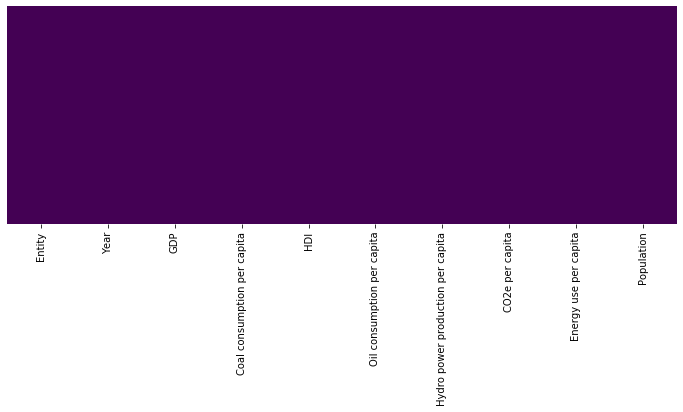

C:\Users\Marina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


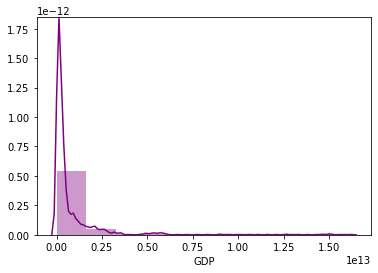

In [36]:
# exploratory plots; is data complete?
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()
sns.distplot(df["GDP"], color="purple", bins=10)
plt.show()

In [37]:
df['Overall energy use in [kwh]']=df['Population']*df['Energy use per capita']
df['Overall CO2e']=df['Population']*df['CO2e per capita']
size_title=15
size_label=12

## line plot 

In [38]:
#neue Spalte hinzufügen, um Jahresdurchschnittswerte zu berechnen zu gewichten 
df_line_plot=df.groupby('Year')['Overall energy use in [kwh]'].sum()
df_line_plot=df_line_plot.to_frame()
df_line_plot['Overall CO2e']=df.groupby('Year')['Overall CO2e'].sum()

In [39]:
cap=[]
for i in range(1990,2015):
    testdf=df.loc[df['Year'] == i] 
    cap.append(testdf["Population"].sum())
df_line_plot["sum of pop"]=cap
df_line_plot["energy use per cap"]=df_line_plot["Overall energy use in [kwh]"]/df_line_plot['sum of pop']
df_line_plot["overall co2e per cap"]=df_line_plot["Overall CO2e"]/df_line_plot['sum of pop']

In [40]:
#df_line_plot.head()
df_line_plot.head()
df_line_plot["overall co2e"]=df.groupby('Year')['Overall CO2e'].sum()
df_line_plot["Pop in Milliards"]=df_line_plot['sum of pop']/1000000000
df_line_plot["overall co2e per cap"]=df_line_plot["overall co2e"]/df_line_plot['sum of pop']

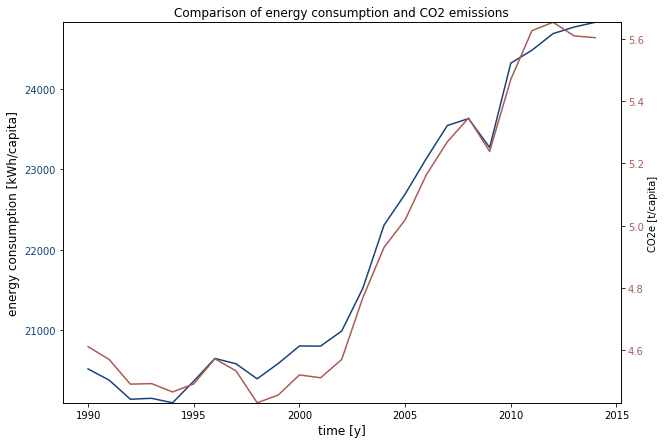

In [41]:
# line plot energy consumption und co2 emissions
fig,ax = plt.subplots(figsize=(10,7))#figsize=(15,12))

# make a plot
color="#164278" 
ax.plot(df_line_plot['energy use per cap'], color=color)
# set x-axis label
ax.set_xlabel("time [y]",fontsize=size_label)
# set y-axis label
ax.set_ylabel("energy consumption [kWh/capita]",fontsize=size_label)
ax.set_ylim(ymin=df_line_plot['energy use per cap'].min())
#ax.set_ylim(ymin=0)
ax.set_ylim(ymax=df_line_plot['energy use per cap'].max())
ax.tick_params(axis='y',labelcolor=color)
ax.set_title('Comparison of energy consumption and CO2 emissions')

color= "#AB5A52"
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_line_plot['overall co2e per cap'],color=color)
ax2.set_ylabel("CO2e [t/capita]")
ax2.set_ylim(ymin=df_line_plot['overall co2e per cap'].min())
#ax2.set_ylim(ymin=0)
ax2.set_ylim(ymax=df_line_plot['overall co2e per cap'].max())
ax2.tick_params(axis='y',labelcolor=color)
plt.show()
fig.savefig('energy_co2', dpi = 300)

## area plot

In [42]:
codes=[]
ccodes=[]
alpha3=[]

In [43]:
for value in df["Entity"]:
    country_code = pc.country_name_to_country_alpha2(value, cn_name_format="default")
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    alpha=pc.country_name_to_country_alpha3(value, cn_name_format="default")
    codes.append(continent_name)
    ccodes.append(country_code)
    alpha3.append(alpha)

In [44]:
df["Continent Code"]=codes
df["Country Code"]=ccodes
df['Country Code Alpha3']=alpha3

In [45]:
df['Continent Code'].unique()

array(['AF', 'SA', 'OC', 'EU', 'AS', 'NA'], dtype=object)

In [46]:
df['Overall CO2 consumption in [t]']=df['Population']*df['CO2e per capita']
df['Overall CO2 consumption in Mio']=df['Overall CO2 consumption in [t]']/1000000
continente=df.groupby(['Continent Code','Year']).sum()

In [47]:
continente.reset_index(inplace=True)

In [48]:
continente['CO2e per capita in Mio']=(continente['Overall CO2 consumption in [t]']/continente["Population"])/1000000

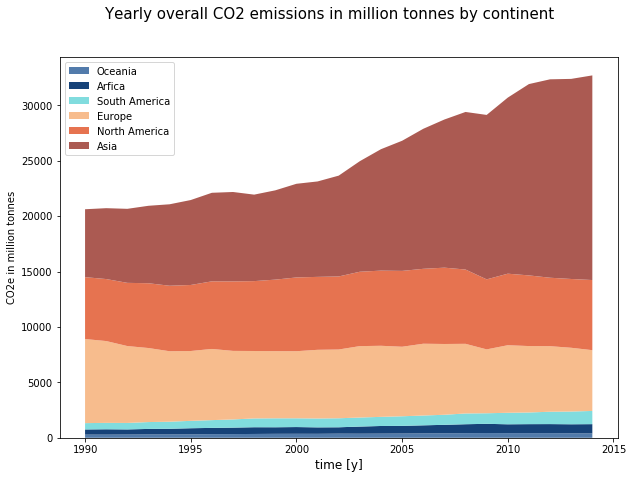

In [49]:
x=df['Year'].unique()

dfeu=continente.loc[continente['Continent Code'] == "EU"]
dfaf=continente.loc[continente['Continent Code'] == 'AF']
dfsa=continente.loc[continente['Continent Code'] == "SA"]
dfoc=continente.loc[continente['Continent Code'] == 'OC']
dfas=continente.loc[continente['Continent Code'] == "AS"]
dfna=continente.loc[continente['Continent Code'] == "NA"]

dfeu.index=dfeu['Year']
dfaf.index=dfaf['Year']
dfsa.index=dfsa['Year']
dfoc.index=dfoc['Year']
dfas.index=dfas['Year']
dfna.index=dfna['Year']

yeu=dfeu['Overall CO2 consumption in Mio']
yaf=dfaf['Overall CO2 consumption in Mio']
ysa=dfsa['Overall CO2 consumption in Mio']
yoc=dfoc['Overall CO2 consumption in Mio']
yas=dfas['Overall CO2 consumption in Mio']
yna=dfna['Overall CO2 consumption in Mio']

yeu = np.array(yeu)
yaf= np.array(yaf)
ysa = np.array(ysa)
yoc= np.array(yoc)
yas = np.array(yas)
yna= np.array(yna)

#https://www.geeksforgeeks.org/matplotlib-pyplot-stackplot-in-python/
## gesamt CO2 betrachtung 

colors = ["#527BAB", "#164278" , "#81DCDE", "#F7BC8D" , "#E67350", "#AB5A52"]
fig=plt.figure(figsize=(10,7))
plt.suptitle('Yearly overall CO2 emissions in million tonnes by continent',fontsize=15)
plt.xlabel('time [y]', fontsize=12)
plt.ylabel('CO2e in million tonnes')
#plt.stackplot(x,yeu,yaf,ysa,yoc,yas,yna, labels=['Europe','Arfica','South America','Oceania','Asia','North America'],colors=['thistle','lightsteelblue','powderblue','turquoise','lightseagreen','cadetblue'],baseline='zero')
#plt.stackplot(x,yoc,yaf,ysa,yeu,yna,yas, labels=['Oceania','Arfica','South America','Europe','North America','Asia'],colors=['cadetblue','powderblue','thistle','turquoise','lightseagreen','lightsteelblue'],baseline='zero')
plt.stackplot(x,yoc,yaf,ysa,yeu,yna,yas, labels=['Oceania','Arfica','South America','Europe','North America','Asia'],colors=colors,baseline='zero')
plt.legend(loc='upper left')
fig.savefig('area_overall', dpi = 300)

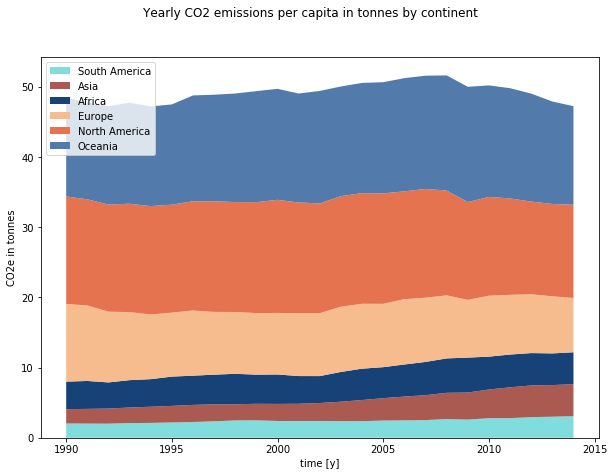

In [50]:
x=df['Year'].unique()

dfeu=continente.loc[continente['Continent Code'] == "EU"]
dfaf=continente.loc[continente['Continent Code'] == 'AF']
dfsa=continente.loc[continente['Continent Code'] == "SA"]
dfoc=continente.loc[continente['Continent Code'] == 'OC']
dfas=continente.loc[continente['Continent Code'] == "AS"]
dfna=continente.loc[continente['Continent Code'] == "NA"]

dfeu.index=dfeu['Year']
dfaf.index=dfaf['Year']
dfsa.index=dfsa['Year']
dfoc.index=dfoc['Year']
dfas.index=dfas['Year']
dfna.index=dfna['Year']

#yeu=dfeu['CO2e per capita']
#yaf=dfaf['CO2e per capita']
#ysa=dfsa['CO2e per capita']
#yoc=dfoc['CO2e per capita']
#yas=dfas['CO2e per capita']
#yna=dfna['CO2e per capita']

yeu=dfeu['Overall CO2 consumption in [t]']/dfeu['Population']
yaf=dfaf['Overall CO2 consumption in [t]']/dfaf['Population']
ysa=dfsa['Overall CO2 consumption in [t]']/dfsa['Population']
yoc=dfoc['Overall CO2 consumption in [t]']/dfoc['Population']
yas=dfas['Overall CO2 consumption in [t]']/dfas['Population']
yna=dfna['Overall CO2 consumption in [t]']/dfna['Population']

yeu = np.array(yeu)
yaf= np.array(yaf)
ysa = np.array(ysa)
yoc= np.array(yoc)
yas = np.array(yas)
yna= np.array(yna)

colors = ["#81DCDE","#AB5A52","#164278","#F7BC8D","#E67350","#527BAB"]
#https://www.geeksforgeeks.org/matplotlib-pyplot-stackplot-in-python/
fig=plt.figure(figsize=(10,7))
plt.suptitle('Yearly CO2 emissions per capita in tonnes by continent')
plt.xlabel('time [y]')
plt.ylabel('CO2e in tonnes')
#plt.stackplot(x,yeu,yaf,ysa,yoc,yas,yna, labels=['Europe','Africa','South America','Oceania','Asia','North America'],colors=['thistle','lightsteelblue','powderblue','turquoise','lightseagreen','cadetblue'],baseline='zero')
#plt.stackplot(x,ysa,yas,yaf,yeu,yna,yoc,labels=['South America','Asia','Africa','Europe','North America','Oceania'],colors=['thistle','lightsteelblue','powderblue','turquoise','lightseagreen','cadetblue'],baseline='zero')
plt.stackplot(x,ysa,yas,yaf,yeu,yna,yoc,labels=['South America','Asia','Africa','Europe','North America','Oceania'],colors=colors,baseline='zero')

plt.legend(loc='upper left')
fig.savefig('area_per_cap', dpi = 300)

## Berechnung Jahre bis 2° bzw. 1,5° Ziel erreicht 

In [51]:
#ger_pop=83020000
world_pop=7821701978
grad2=1058865080000
grad1_5=310011059305
df14=df.loc[df['Year']==2014]

In [52]:
jahre2=[]
for j in df14["Entity"]:
    co2=df14.loc[(df['Entity']==j)&(df["Year"]==2014),['CO2e per capita']]
    co2=co2['CO2e per capita'].values[0]
    jahre2.append(grad2/(co2*world_pop))

jahre1_5=[]
for j in df14["Entity"]:
    co2=df14.loc[(df['Entity']==j)&(df["Year"]==2014),['CO2e per capita']]
    co2=co2['CO2e per capita'].values[0]
    jahre1_5.append(grad1_5/(co2*world_pop))
    
summenprodukt=0
for j in df14["Entity"]:
    co2=df14.loc[(df['Entity']==j)&(df["Year"]==2014),['CO2e per capita']]
    pop=df14.loc[(df['Entity']==j)&(df["Year"]==2014),['Population']]
    co2=co2['CO2e per capita'].values[0]
    pop=pop['Population'].values[0]
    summenprodukt=summenprodukt+co2*pop
    #jahre1_5.append(grad1_5/(co2*world_pop))    

In [53]:
ziel1_5=grad1_5/summenprodukt
ziel2=grad2/summenprodukt

In [54]:
df14["Years to 2°"]=jahre2
df14["Years to 1,5°"]=jahre1_5

C:\Users\Marina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Marina\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## histogramme

In [55]:
df_hist=df14[['Years to 1,5°']]

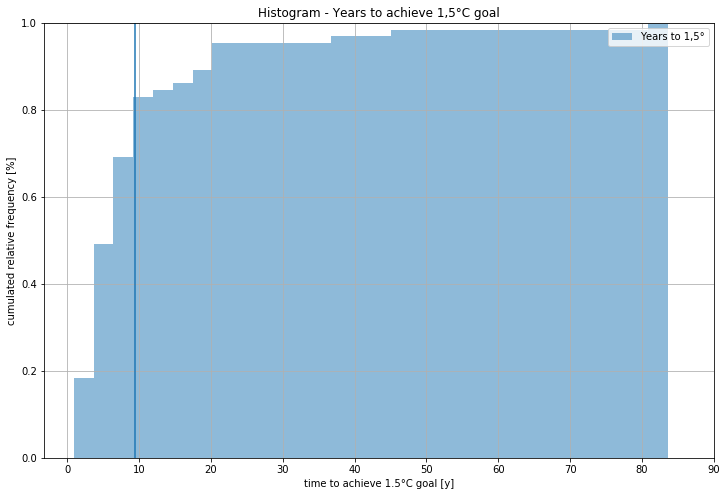

In [56]:
#https://www.mcc-berlin.net/forschung/co2-budget.html
#fig=plt.figure()

ax=df_hist.plot.hist(bins=30,alpha=0.5,figsize=(12,8),weights = np.ones_like(df_hist.index) / len(df_hist.index),cumulative=1)
ax.grid(True)
ax.set_title('Histogram - Years to achieve 1,5°C goal')
ax.set_xlabel('time to achieve 1.5°C goal [y]')
ax.set_ylabel('cumulated relative frequency [%]')
plt.legend(loc='upper right')
ax=ax.set_ylim(ymax=1)
plt.xticks([0,10,20,30,40,50,60,70,80,90])
plt.axvline(x=ziel1_5)
#plt.axvline(x=ziel2,color='k')
fig = plt.gcf()
fig.savefig('histogram', dpi = 300)